<a href="https://colab.research.google.com/github/MiraMichael-coder/Data-analysis-proj1/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
upload = files.upload()


Saving Stress Levels - Form Responses 1.csv to Stress Levels - Form Responses 1.csv


In [ ]:
df=pd.read_csv('Stress Levels - Form Responses 1.csv')
#df.head()


<bound method DataFrame.all of    What is your current academic year?  Acadmic year  \
0                               Year 2             2   
1                               Year 2             2   
2                               Year 4             4   
3                               Year 1             1   
4                               Year 2             2   
5                               Year 3             3   
6                               Year 1             1   
7                               Year 3             3   
8                               Year 1             1   
9                               Year 1             1   
10                              Year 1             1   
11                              Year 3             3   
12                              Year 3             3   
13                              Year 3             3   
14                              Year 4             4   
15                              Year 3             3   
16                              Year 1             1   
17                              Year 3             3   
18                              Year 1             1   
19                              Year 2             2   
20                              Year 2             2   
21                              Year 2             2   
22                              Year 3             3   
23                              Year 3             3   
24                              Year 3             3   
25                              Year 1             1   
26                              Year 2             2   
27                              Year 2             2   
28                              Year 2             2   
29                              Year 1             1   
30                              Year 1             1   
31                              Year 4             4   
32                              Year 3             3   
33                              Year 1             1   
34                              Year 3             3   
35                              Year 1             1   
36                              Year 2             2   
37                              Year 1             1   
38                              Year 1             1   
39                              Year 2             2   
40                              Year 2             2   
41                              Year 2             2   
42                              Year 4             4   
43                              Year 1             1   
44                              Year 2             2   
45                              Year 2             2   
46                              Year 1             1   
47                              Year 1             1   
48                              Year 3             3   
49                              Year 2             2   
50                              Year 1             1   

    On a scale of 1 to 5, how would you rate your overall academic performance this semester? (1 = Very Poor, 5 = Excellent)   \
0                                                   3                                                                           
1                                                   1                                                                           
2                                                   4                                                                           
3                                                   4                                                                           
4                                                   4                                                                           
5                                                   3                                                                           
6                                                   3                                                                           
7                       

In [ ]:
print(df.columns)
df.rename(columns = {'On a scale of 1 to 5, how would you rate your overall academic performance this semester? (1 = Very Poor, 5 = Excellent) ':'Academic preformance',
                        'What was your GPA for the last semester?':'GPA',
                    'How many  per week do you spend on academic work outside of class? ':'Study Time',
                     'Do you feel that your sleep habits impact your academic performance? (Yes/No/Not Sure)':'Sleep Imapct',
                      'On average, how many  of sleep do you get per night?\n':'Sleep Hours',
                     'On a scale of 1 to 5, how would you rate the quality of your sleep? (1 = Very Poor, 5 = Excellent) ':'Sleep Quality',
                     'Do you have any diagnosed sleep disorders (e.g., insomnia, sleep apnea)? ':'Sleep Disorder',
                     'What factors disrupt your sleep? (Select all that apply) ':'Sleep Disruption',
                    }, inplace=True)
df.head()


Index(['What is your current academic year?', 'Acadmic year',
       'On a scale of 1 to 5, how would you rate your overall academic performance this semester? (1 = Very Poor, 5 = Excellent) ',
       'What factors disrupt your sleep? (Select all that apply) ',
       'How many  per week do you spend on academic work outside of class? ',
       'Do you feel that your sleep habits impact your academic performance? (Yes/No/Not Sure)',
       'On average, how many  of sleep do you get per night?\n',
       'On a scale of 1 to 5, how would you rate the quality of your sleep? (1 = Very Poor, 5 = Excellent) ',
       'What was your GPA for the last semester?',
       'Do you have any diagnosed sleep disorders (e.g., insomnia, sleep apnea)? ',
       'Column 2', 'Column 1'],
      dtype='object')


,What is your current academic year?,Acadmic year,Academic preformance,Sleep Disruption,Study Time,Sleep Imapct,Sleep Hours,Sleep Quality,GPA,Sleep Disorder,Column 2,Column 1
0,Year 2,2,3,Academic stress,6-10,Yes,0-4,2,3.11,NaN,NaN,NaN
1,Year 2,2,1,"Technology use, Noise or environment",0-5,Yes,5–6,3,3.02,No,NaN,NaN
2,Year 4,4,4,Technology use,0-5,Yes,7–8,3,3.20,No,NaN,NaN
3,Year 1,1,4,Social activities,6-10,Maybe,0-4,2,2.70,No,NaN,NaN
4,Year 2,2,4,"Academic stress, Noise or environment",16-20,Maybe,0-4,2,3.50,No,NaN,NaN


In [ ]:
df = df.drop(['Column 2','Column 1'], axis=1)

In [ ]:
# prompt: wanna see how many rows

print(len(df))


51


In [ ]:

# Define a mapping for study time categories
study_time_mapping = {
    '0-5 ': 'Low',
    '6-10': 'Medium',
    '11-15': 'High',
    '15-20 hours': 'Very High',

}

# Create a new column for study time categories
df['Study Time Category'] = df['Study Time'].map(study_time_mapping)

In [ ]:
def count_sleep_disruption_reasons(df):
  disruption_counts = {}
  for disruptions in df['Sleep Disruption']:
    if isinstance(disruptions, str):
      disruption_list = disruptions.split(',')  # Assuming commas separate reasons
      for reason in disruption_list:
        reason = reason.strip()  # Remove leading/trailing whitespace
        if reason in disruption_counts:
          disruption_counts[reason] += 1
        else:
          disruption_counts[reason] = 1
  return disruption_counts

disruption_counts=count_sleep_disruption_reasons(df)

In [ ]:
df.describe()

,Acadmic year,Academic preformance,Sleep Quality,GPA
count,51.000000,51.000000,51.000000,51.000000
mean,2.058824,2.843137,2.764706,2.888431
std,0.967714,1.027084,1.069359,0.692645
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.435000
50%,2.000000,3.000000,3.000000,3.000000
75%,3.000000,3.000000,3.000000,3.390000
max,4.000000,5.000000,5.000000,4.000000


In [ ]:
print("Mean GPA:", df['GPA'].mean())
print("Median GPA:", df['GPA'].median())
print("Mode GPA:", df['GPA'].mode()[0])

Mean GPA: 2.88843137254902
Median GPA: 3.0
Mode GPA: 2.4


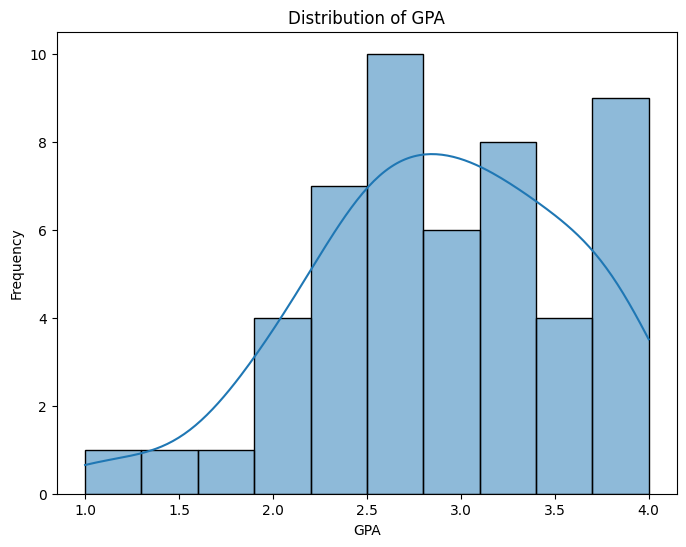

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(df['GPA'], bins=10, kde=True)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

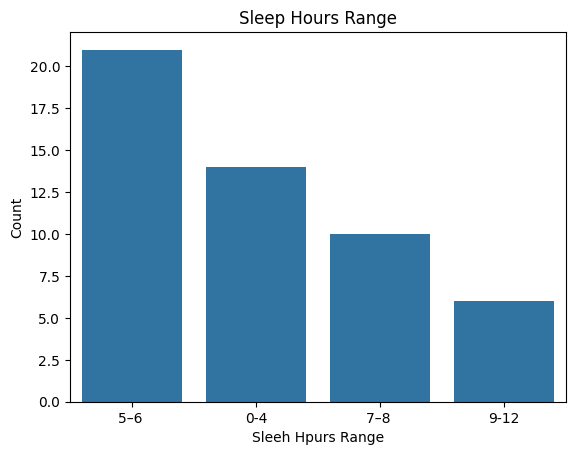

In [ ]:
sns.countplot(data= df, x='Sleep Hours',order=df['Sleep Hours'].value_counts().index)
plt.title('Sleep Hours Range')
plt.xlabel('Sleeh Hpurs Range')
plt.ylabel('Count')
plt.show()

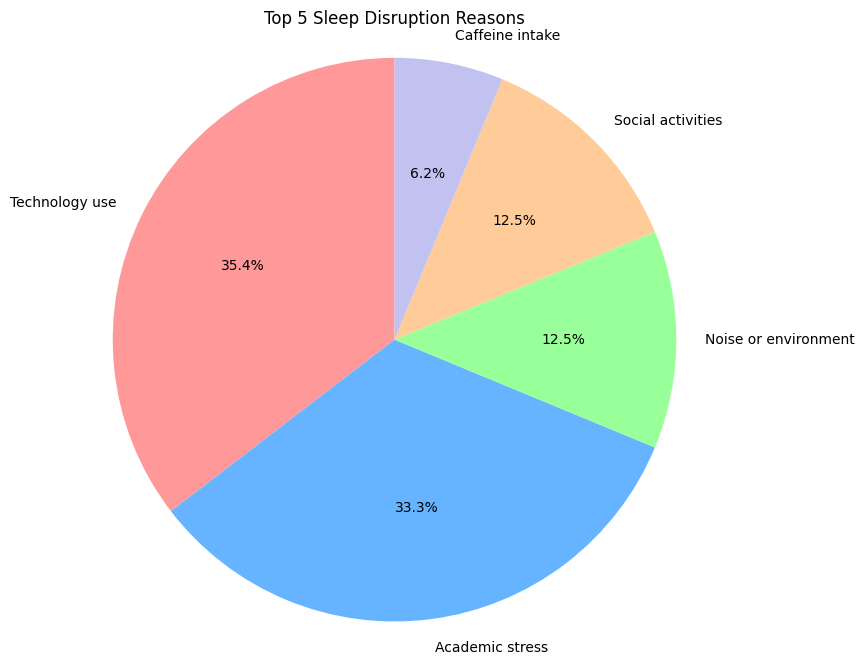

In [ ]:
top_5_disruptions = dict(sorted(disruption_counts.items(), key=lambda item: item[1], reverse=True)[:5])

labels = list(top_5_disruptions.keys())
sizes = list(top_5_disruptions.values())

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Top 5 Sleep Disruption Reasons')
plt.show()


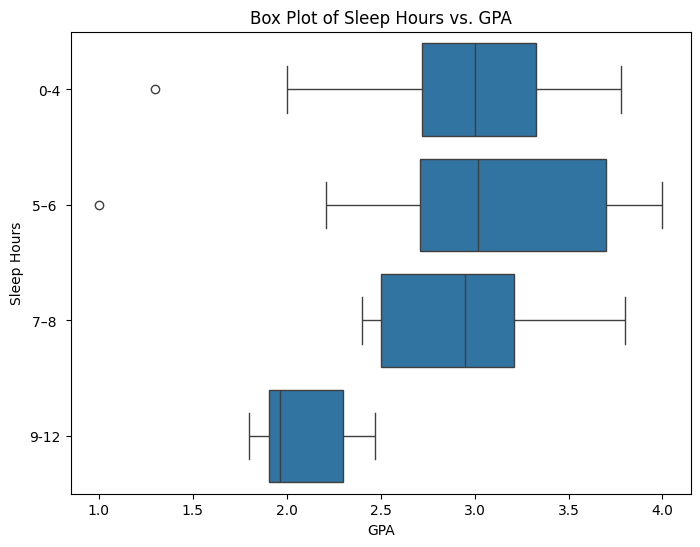

In [ ]:
# prompt: create aa box plot of sleep hours and Gpa

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='GPA', y='Sleep Hours', data=df)
plt.title('Box Plot of Sleep Hours vs. GPA')
plt.xlabel('GPA')
plt.ylabel('Sleep Hours')
plt.show()


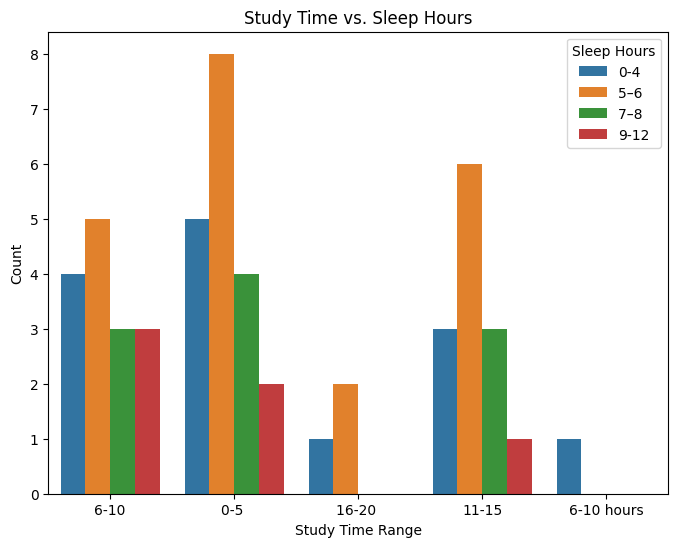

In [ ]:

sleep_hours_order = sorted(df['Sleep Hours'].unique())
plt.figure(figsize=(8, 6))
sns.countplot(x='Study Time', hue='Sleep Hours',hue_order =sleep_hours_order, data=df)
plt.title('Study Time vs. Sleep Hours')
plt.xlabel('Study Time Range')
plt.ylabel('Count')
plt.show()


In [ ]:

df.to_csv('updated_stress_levels_data.csv', index=False)
files.download('updated_stress_levels_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>